# Data Description

In [83]:
from __future__ import division, print_function
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from astropy.io import ascii
from utils import col_names, relevant_indices
import math
from sklearn.model_selection import train_test_split
random_state = 1
from scipy.stats import skew, kurtosis
%matplotlib inline

In [76]:
datasets = "../datasets/SuperCOSMOS/"
img_dir = "../img/"
img_dir_db = "/home/phil/Dropbox/Apps/Overleaf/DME SSS Project Final/img/"
tables_dir_db = "/home/phil/Dropbox/Apps/Overleaf/DME SSS Project Final/tables/"

uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
uki823_df.columns = col_names

uki823_rel_df = uki823_df.iloc[:, relevant_indices]

X_raw = uki823_df
yy = uki823_df['CLASS_SDSS']

# 70, 20, 10
X_temp, X_raw_test, yy_temp, yy_test = train_test_split(X_raw, yy, test_size=0.1, random_state=random_state)
#22% of 90% = 20%
X_raw_train, X_raw_val, yy_train, yy_val = train_test_split(X_temp, yy_temp, test_size=0.22, random_state=random_state)

uki823_rel_df = X_raw_train

In [77]:
uki823_rel_df.describe().loc[:, ["AREA", "IPEAK"]].round(3).to_latex(buf=tables_dir_db+"scaling-vars.tex")

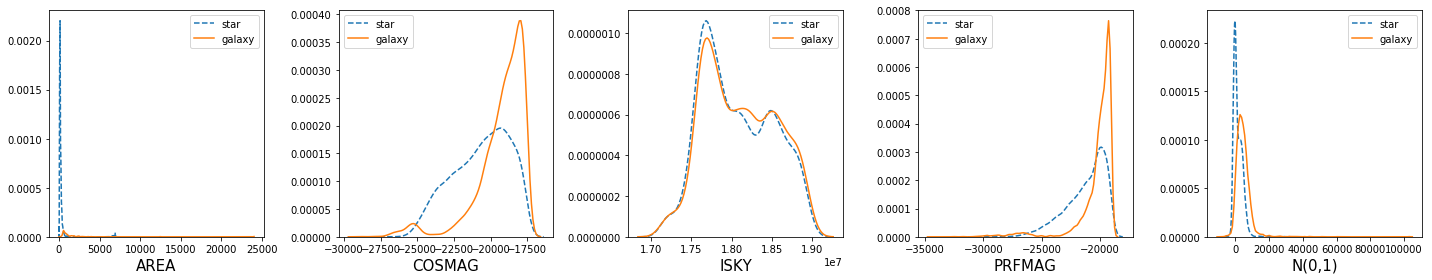

In [78]:
width = 2
non_useful_cols = ["BLEND", "QUALITY", "CLASS_SDSS", "RMAG_SDSS", "GMAG_SDSS", "IMAG_SDSS", "RA_SDSS", "DEC_SDSS"]
# fig, ax = plt.subplots(width, math.floor((uki823_rel_df.shape[1]-len(non_useful_cols))/width), figsize=(18,5))

# to_iter = uki823_rel_df.drop(non_useful_cols, axis=1)
to_iter = uki823_rel_df.loc[:, ["AREA", "COSMAG", "ISKY", "PRFMAG", "N(0,1)"]]

fig, ax = plt.subplots(1, to_iter.shape[1], figsize=(20,4))

for ii, col in enumerate(to_iter):
#     a = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 6], ax=ax[ii % width][math.floor(ii / width)], label="star", hist=False, kde_kws={"linestyle": "--"})
    a = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 6], ax=ax[ii], label="star", hist=False, kde_kws={"linestyle": "--"})
    a.set_xlabel(col, fontsize=15)
#     b = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 3], ax=ax[ii % width][math.floor(ii / width)], label="galaxy", hist=False)
    b = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 3], ax=ax[ii], label="galaxy", hist=False)
    
# fig.legend(("star", "galaxy"))
fig.tight_layout()
fig.savefig(img_dir_db + 'var-dist-by-class.pdf', format='pdf', dpi=1200)

In [79]:
uki823_rel_df_star = uki823_rel_df[uki823_rel_df.CLASS_SDSS == 6]
uki823_rel_df_gala = uki823_rel_df[uki823_rel_df.CLASS_SDSS == 3]

In [80]:
uki823_rel_df_star.describe()

,RA,DEC,XMIN,XMAX,YMIN,YMAX,AREA,IPEAK,COSMAG,ISKY,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
count,6.905000e+03,6.905000e+03,6.905000e+03,6.905000e+03,6.905000e+03,6.905000e+03,6905.000000,6.905000e+03,6905.000000,6.905000e+03,...,6905.000000,6905.000000,6905.000000,6905.000000,6905.000000,6905.000000,6905.000000,6905.000000,6905.000000,6905.0
mean,3.123954e+08,3.900129e+04,2.111020e+07,2.112160e+07,1.643338e+07,1.644453e+07,92.651412,1.719857e+07,-20652.458219,1.806597e+07,...,1622.353077,-21203.567415,17.189687,16.970039,178.989467,0.022312,19.277385,18.258420,17.584094,6.0
std,3.133066e+08,1.261415e+06,3.094226e+06,3.094227e+06,3.875001e+06,3.874928e+06,138.016524,1.913824e+07,1926.231657,4.424660e+05,...,2484.373481,1694.648897,1.279492,1.829077,179.511446,0.722722,2.307732,2.014467,1.769866,0.0
min,1.440000e+02,-2.170016e+06,1.578590e+07,1.579490e+07,9.651940e+06,9.656940e+06,8.000000,1.308288e+06,-27632.000000,1.709983e+07,...,-5440.000000,-31741.000000,12.107000,5.987000,0.000165,-1.243352,10.068565,8.094688,9.296418,6.0
25%,8.764790e+05,-1.030188e+06,1.841122e+07,1.842022e+07,1.314694e+07,1.315496e+07,24.000000,3.034056e+06,-22094.000000,1.768927e+07,...,-283.000000,-22210.000000,16.284000,15.873000,0.502217,-0.590271,17.819883,17.005150,16.529799,6.0
50%,1.733043e+06,5.507700e+04,2.111552e+07,2.112951e+07,1.648297e+07,1.649194e+07,53.000000,6.952748e+06,-20385.000000,1.800708e+07,...,923.000000,-20786.000000,17.471000,17.419000,0.992998,0.031523,19.665079,18.670732,17.981073,6.0
75%,6.274518e+08,1.131696e+06,2.377183e+07,2.378182e+07,1.979394e+07,1.980194e+07,117.000000,2.807207e+07,-19088.000000,1.845131e+07,...,3338.000000,-19879.000000,18.225000,18.404000,359.503607,0.648376,21.111250,19.786081,18.925499,6.0
max,6.283183e+08,2.222493e+06,2.651011e+07,2.651511e+07,2.313594e+07,2.315595e+07,6953.000000,9.656834e+07,-17438.000000,1.899585e+07,...,29044.000000,-18979.000000,19.208000,19.381000,359.999933,1.273383,22.995615,24.802017,24.361635,6.0


In [81]:
uki823_rel_df_gala.describe().subtract(uki823_rel_df_star.describe()).drop("count").loc[:, ["AREA", "COSMAG", "ISKY", "PRFMAG", "N(0,1)"]].round(3).to_latex(buf=tables_dir_db+"diff-in-fields.tex")

In [105]:
gala_df = to_iter[uki823_rel_df.CLASS_SDSS == 3].skew().to_frame().transpose().rename({0: "galaxies"})
star_df = to_iter[uki823_rel_df.CLASS_SDSS == 6].skew().to_frame().transpose().rename({0: "stars"})
gala_df.append(star_df)

,AREA,COSMAG,ISKY,PRFMAG,"N(0,1)"
galaxies,31.916588,-2.055392,0.152034,-3.573360,5.645517
stars,19.555160,-0.396253,0.247475,-1.004285,1.260154


In [106]:
gala_df = to_iter[uki823_rel_df.CLASS_SDSS == 3].kurtosis().to_frame().transpose().rename({0: "galaxies"})
star_df = to_iter[uki823_rel_df.CLASS_SDSS == 6].kurtosis().to_frame().transpose().rename({0: "stars"})
gala_df.append(star_df)

,AREA,COSMAG,ISKY,PRFMAG,"N(0,1)"
galaxies,1376.359188,5.071203,-1.010145,14.87198,86.784381
stars,892.451459,-0.778362,-0.996412,0.61248,5.070790
